In [17]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
# train - datos de entrenamiento
# test - datos de prueba

TypeError: ignored

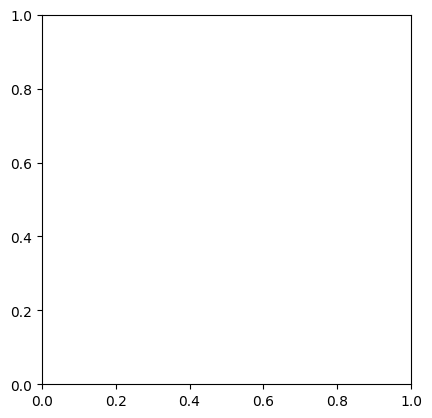

In [30]:
import matplotlib.pyplot as plt
# Para imprimir la imagen
# Hacemos un color map a binary (escala de grises)
plt.imshow(x_train[8],cmap='binary')
#plt.imshow(x_train[8],cmap=plt.cm.binary) #Equivalente a la línea sueprior
#plt.imshow(x_train[8],cmap='binary_r') # Inverte el blanco por el negro
#Para ver el label
print(y_train[8])

In [19]:
# Concoer nuestros datos
print("x_trian dims: ",x_train.ndim)
print("x_train shape: ", x_train.shape)
print("x_train dtype: ",x_train.dtype)

x_trian dims:  3
x_train shape:  (60000, 28, 28)
x_train dtype:  uint8


In [20]:
# Supongamos que queremos seleccionar los dígitos del 1 hasta el 99
# y almacenarlos en otro sensor
my_slice = x_train[1:100:,:]
# Equivalente a x_train[1:100,0:28,0:28]
print(my_slice.shape)

# Por ejemplo, seleccionar 14x14 píxeles en la esquina inferior
# derecha de todas las imágenes
# - - - -
# - - - -
# - - * *  <--- Área selecionada
# - - * *  <---
my_slice = x_train[:,14:,14:]
print(my_slice.shape)

# Por ejemplo, recortar la parte central de 14x14 píxeles
# usando índices negativos
my_slice = x_train[:,7:-7,7:-7]
print(my_slice.shape)

(99, 28, 28)
(60000, 14, 14)
(60000, 14, 14)


In [21]:
# Normalización de datos de 0-255 a 0-1. Esto implica
# que, en lugar de trabajr con uint8, se debería trabajar con
# flotantes
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train/=255
x_test/=255

In [22]:
# Transformar 3D a 2D
# Es decir, de 28x28 a 784 números
x_train = x_train.reshape(60000,784)
x_test = x_test.reshape(10000,784)
print(x_train.shape)
print(x_test.shape)
# Tiene el mismo número total de datos pero reorganizados

(60000, 784)
(10000, 784)


In [23]:
# Codificación One-hot: Transformar las etiquetas en un vector
# de tantos ceros como números de etiquetas distintas, y que
# contiene el valor 1 en el índice deseado.
# Esto se consigue con to_categorical

print(" === Antes ===")
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)

from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

print(" === Después ===")
print(y_test[0])
print(y_train[0])
print(y_train.shape)
print(y_test.shape)


 === Antes ===
7
5
(60000,)
(10000,)
 === Después ===
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
(60000, 10)
(10000, 10)


In [24]:
# La estructura de datos principal en Keras es la clase Sequential
# En este caso, el modelo en Keras se considera como una secuencia
# de capas, cada uan de ellas va destilando gradualmente los datos
# de entrada apra obtener la salida deseada.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Se ajusta el modelo a tipo secuencial
model = Sequential()
model.add(Dense(10,activation = 'sigmoid', input_shape=(784,)))
model.add(Dense(10,activation='softmax'))
# Se agregan dos capas de 10 neuronas
# La salida de la primera será = 10 * 784 + 10 = 7850
# La segunda capa, al tratarse de tipo softmax, se requiere conectar
# todas sus 10 neuronas con las 10 neuronas de la capa anterior,
# además de los 10 sesgos bj correspondientes a cada nodo, da un
# total de 110 parámetros

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 10)                7850      
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
Total params: 7960 (31.09 KB)
Trainable params: 7960 (31.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
# Compilar el modelo

model.compile(loss="categorical_crossentropy",
              optimizer = 'sgd',
              metrics=['accuracy'])
# Función de coste: Categorical_crossentropy
# Optimizador: sgd - stocastic gradient descent
# Métrica - accuracy

# Función de pérdida/coste/error = Evalúa el grado de error entre
#           entre las salidas calculadas y las salidas deseadas de
#           los datos de entrenamiento.
# Optimizador: Indica detalles al algoritmo de optimización que
#           permite a la red calcular los pesos de los parámetros
#           durante el entrenamiento.
# Métrica: Solo tendremos en cuenta la precisión(fracicón de imágenes
#           que fueron correctamente clasificadas).

In [26]:
# Entrenamiento del modelo
model.fit(x_train,y_train, epochs=5)
# xtrain y ytrain son los datos con lo que entrenaremos el modelo en forma de arrays numpy
# Epochs indica el número de veces que usaremos todos los datos en el proceso de aprendizaje
# Este método encuentra el valor de los parámetros de la red
# mediante el algoritmo iterativo de entrenamiento que hemos especificado en el
# argumento optimizer del método compile()


Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 1.9237 - accuracy: 0.4715
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 1.3212 - accuracy: 0.6974
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.9817 - accuracy: 0.7851
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.7987 - accuracy: 0.8192
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.6891 - accuracy: 0.8374


In [27]:
#Evaluación del modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 1s 4ms/step - loss: 0.6363 - accuracy: 0.8511
Test accuracy: 0.8511000275611877


In [32]:
# Generar predicciones
#plt.imshow(x_test[11], cmap='binary')
predictions = model.predict(x_test)
# Una vez calculado el vector resultado, podemos saber a qué clase
# le da más probabilidad de pertenencia mediante la función
# argmax de NumPy
print(predictions[11])
np.sum(predictions[11])
# El 7mo valor es el más alto, así que es un '6'



313/313 [==============================] - 1s 2ms/step
[0.11216334 0.04418443 0.20445399 0.0245159  0.02554894 0.06683988
 0.43566316 0.00506666 0.07613558 0.00542818]


1.0